In [60]:
import json
import pandas as pd
import requests
import seaborn as sns

In [61]:
# We doen een "aanvraag" bij de API. Deze url werkt alleen als de rest server gestart is. 
# response = requests.get('http://localhost:8080/medish_centrum_randstad/api/netlify?page=1')

In [62]:
# Checken wat voor data/type we binnen hebben gekregen
# response.headers['content-type']

In [152]:
#Nieuwe data opgeslagen

df = pd.read_csv('data.csv')

In [153]:
df.head()

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan
0,73.9,185,99.7,0.9,0.0,2.4,6.9,73.1
1,86.0,172,105.4,1.8,8.1,0.4,4.2,85.0
2,83.3,176,111.4,1.1,0.8,4.6,7.5,81.6
3,82.8,164,111.4,4.7,11.8,1.0,2.9,81.0
4,78.7,178,71.6,1.5,8.3,4.9,5.5,75.0


In [136]:
# Om eventuele problemen met training/test subsets van de data te voorkomen, heb ik ervoor gekozen om de rijen
# in willekeurige volgorde te zetten:

# df_final = df_final.sample(frac=1)

In [103]:
# We hebben nu een werkbaar dataframe met al onze variabelen in de kolommen, en alle individuele patienten/datapunten
# in de rijen. We kunnen deze nu evt. als een nieuwe csv file exporteren, zonder index:

# df_final.to_csv('data_clean.csv', index=False, sep=';')

In [154]:
# Als een van de eerste stappen in de IDE kunnen we kijken naar wat voor soort variabelen we hebben,
# van welk type deze variabelen zijn (categorisch of numeriek), en ook of er bijvoorbeeld waardes missen. 

# Eerst kijken we naar de datatypen van elke kolom
print(df.dtypes)
print(df.info())
print(df)

genetic      object
length       object
mass         object
exercise     object
smoking     float64
alcohol      object
sugar        object
lifespan    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4096 entries, 0 to 4095
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   genetic   4096 non-null   object 
 1   length    4096 non-null   object 
 2   mass      4096 non-null   object 
 3   exercise  4096 non-null   object 
 4   smoking   4096 non-null   float64
 5   alcohol   4096 non-null   object 
 6   sugar     4096 non-null   object 
 7   lifespan  4096 non-null   float64
dtypes: float64(2), object(6)
memory usage: 256.1+ KB
None
     genetic length   mass exercise  smoking alcohol sugar  lifespan
0       73.9    185   99.7      0.9      0.0     2.4   6.9      73.1
1       86.0    172  105.4      1.8      8.1     0.4   4.2      85.0
2       83.3    176  111.4      1.1      0.8     4.6   7.5      

In [164]:
# Alleen de smoking en lifespan zijn floats, de rest zijn 'objects'
# Die moeten worden verander in floats, maar dat gaat niet vanwege bepaalde non-numerieke waardes
# Vind en verwijder die waardes.

#dmv een csv-editor in VSC is er te zien dat sommige waardes een ? zijn. 

for c in df.columns: 
    df.drop(df.index[df[c] == '?'], inplace = True)
    
print(df.isin(['?']).sum(axis=0))

genetic     0
length      0
mass        0
exercise    0
smoking     0
alcohol     0
sugar       0
lifespan    0
dtype: int64


In [168]:
#vind alle null-waardes
df_null = df[df.isnull().any(axis=1)]

df_null


,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan


In [196]:
# Er zijn geen null-waardes meer.

#verander nu de objects in floats

df['genetic'] = df.genetic.astype(float)
#df['length'] = df.length.astype(float)
df['mass'] = df.mass.astype(float)
df['exercise'] = df.exercise.astype(float)
df['alcohol'] = df.alcohol.astype(float)
df['sugar'] = df.sugar.astype(float)
print(df.dtypes)

#Bij het aanpassen van 'length' verschijnt er een foutmelding. Er zitten nog 'undefined items' in de data.  


genetic     float64
length       object
mass        float64
exercise    float64
smoking     float64
alcohol     float64
sugar       float64
lifespan    float64
dtype: object


In [253]:
#df["length"] = pd.to_numeric(df["length"])
# ValueError: Unable to parse string "undefined" at position 1036

df.iloc[1036]

genetic          81.5
length      undefined
mass            100.2
exercise          2.5
smoking           8.9
alcohol           1.3
sugar             7.9
lifespan         81.2
Name: 1038, dtype: object

In [282]:
# Op plek 1036 is de waarde van kolom 'length' het woord 'undefined'.
# vind en verwijder de rijen waarin dit voorkomt. 

for c in df.columns: 
    df.drop(df.index[df[c] == 'undefined'], inplace = True)


In [283]:
# pas het type van 'length' nu ook aan naar float. 

df['length'] = df.length.astype(float)
print(df.dtypes)

genetic     float64
length      float64
mass        float64
exercise    float64
smoking     float64
alcohol     float64
sugar       float64
lifespan    float64
dtype: object


In [284]:
#Er zijn geen null-waardes (meer). Wel zijn er negatieve waardes in 'lifespan'. 
#Die moeten worden verwijderd. 

df.drop(df.loc[df['lifespan'] <0 ].index, inplace = True)      

df.loc[df['lifespan'] <0 ]

,genetic,length,mass,exercise,smoking,alcohol,sugar,lifespan


In [263]:
#sla de opgeschoonde dataset op 
df.to_csv("Data_clean.csv")

In [285]:
print(df.nunique())

genetic     381
length       61
mass        986
exercise     55
smoking     223
alcohol      61
sugar       132
lifespan    411
dtype: int64


In [234]:
# Een volgende stap is om eens te kijken naar wat van de variabelen, hoe zit het bijvoorbeeld met de gemiddelde
# levensverwachting en suikerinname? 

df[['sugar', 'lifespan']].groupby(['sugar'], as_index=False).mean().sort_values(by='sugar', ascending=False)

,sugar,lifespan
131,13.8,77.985714
130,13.7,74.950000
129,13.6,77.575000
128,13.5,79.533333
127,13.4,82.733333
...,...,...
4,1.1,79.157143
3,1.0,80.920000
2,0.9,85.357143
1,0.8,80.030000


In [238]:
# Hier zien we een duidelijke afname in levensverwachting naarmate 'sugar' een hogere waarde aanneemt. 
# Hetzelfde kunnen we doen voor 'exercise'

df[['exercise', 'lifespan']].groupby(['exercise'], as_index=False).mean().sort_values(by='lifespan', ascending=False)

,exercise,lifespan
46,4.7,84.000000
51,5.2,83.114286
42,4.3,83.072549
40,4.1,82.678049
54,5.5,82.600000
50,5.1,82.525000
49,5.0,82.441176
44,4.5,82.374510
47,4.8,82.160000
2,0.3,82.088235


In [ ]:
# Wat niet zozeer interessant is voor ons toekomstige model, maar wel interessant: hoe is het gesteld met het bewegen
# in deze dataset; 

#df['exercise'].value_counts()

C:\Users\noeki\AppData\Local\Temp\ipykernel_22908\807874911.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())
C:\Users\noeki\AppData\Local\Temp\ipykernel_22908\807874911.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


           genetic      mass  exercise   smoking   alcohol     sugar  lifespan
genetic   1.000000  0.000700 -0.034775 -0.014621 -0.013156  0.018234  0.949813
mass      0.000700  1.000000  0.007959 -0.009465  0.000815  0.005083 -0.065880
exercise -0.034775  0.007959  1.000000  0.021698 -0.024652 -0.007952  0.083146
smoking  -0.014621 -0.009465  0.021698  1.000000 -0.012308  0.008627 -0.245293
alcohol  -0.013156  0.000815 -0.024652 -0.012308  1.000000  0.003585 -0.063553
sugar     0.018234  0.005083 -0.007952  0.008627  0.003585  1.000000 -0.011203
lifespan  0.949813 -0.065880  0.083146 -0.245293 -0.063553 -0.011203  1.000000


<AxesSubplot: >

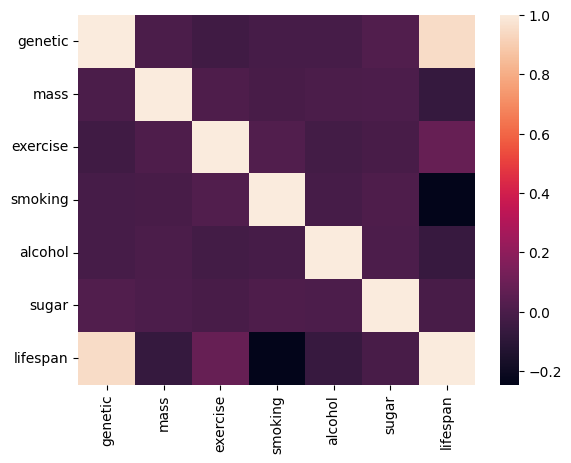

In [240]:
#We kunnen nu kijken naar eventuele onderlinge correlaties:
print(df.corr())
sns.heatmap(df.corr())

In [270]:
df.corr()['lifespan']

genetic     0.949799
length      0.013155
mass       -0.066040
exercise    0.082986
smoking    -0.246140
alcohol    -0.063539
sugar      -0.010887
lifespan    1.000000
Name: lifespan, dtype: float64

<AxesSubplot: xlabel='genetic'>

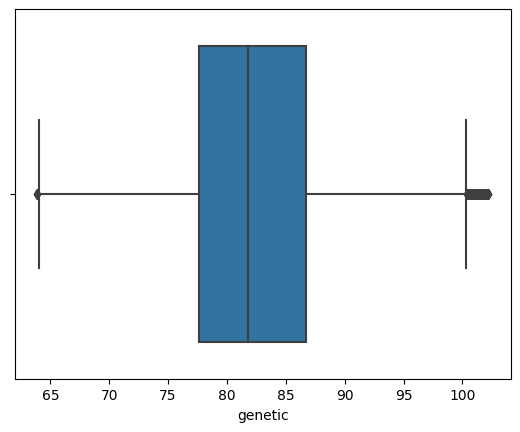

In [280]:
#controleer op outliers met boxplots

sns.boxplot(x=df['genetic'])

#Alleen bij 'genetic' en 'lifespan' zijn er outliers. 
